# Introduction

In this notebook, I'm going to asses performance of sequential and MPI program for calculating dot product of two matrices. 

Objectives of the experiment:

* Observe the dependence between the execution time and matrix size
* Compare with sequential implementation

In [1]:
%matplotlib inline
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from mpl_toolkits import mplot3d

# Test inputs

For this experiment, I will change only matrix size while keeping number of processors involved at 4.

In [9]:
# processors involved
proc_num = 4
# X-sized square matrix must be dividable by 4 into sqare parts
min_matrix_sizes = [200, 400, 600, 800, 1200, 1600, 2200, 2800, 3400]

# Running the experiment

To test the binaries, I'm going to generat bash scripts:

In [10]:
with open('.build/test.bash', 'w') as file:
    file.write("#!/bin/bash\n")
    for matrix_size in min_matrix_sizes:
        file.write("mpirun -np" + " " + str(proc_num) + " " + "./matrix_dot_mpi " + str(matrix_size) + "\n")

For test purposes, I'm going to use linux machine with debian-unstable, hardware info:

* CPU Model: Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 8 cores
* Memory: 32GB RAM, Swap disabled

I'm going to run generated with saving data to CSV:

```
.build$ bash test.bash |tee -a results.csv
```

And then import them back to this notebook:

In [11]:
sample_output = np.loadtxt(".build/results.csv", delimiter=";")

# Analysing data

## Matrix size to execution time

For this example, I'm going to go with visualizing raw data for every number of threads:

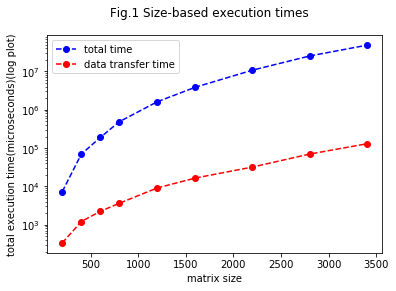

In [17]:
plt.plot(sample_output[:,0],sample_output[:,3], color="blue", linestyle='dashed', marker='o', label='total time')
plt.plot(sample_output[:,0],sample_output[:,2], color="red", linestyle='dashed', marker='o', label='data transfer time')
plt.yscale('log')
plt.xlabel('matrix size')
plt.ylabel('time(microseconds)(log plot)')
plt.suptitle('Fig.1 Size-based execution times')
plt.legend()
plt.show()

## Comparing with single-threaded version

I'm going to compare performance of this alogirhtm with pre-existing resuts from single-threaded ijk-algorithm:

In [18]:
sample_output_ijk = np.loadtxt(".build/results_ijk.csv", delimiter=";")

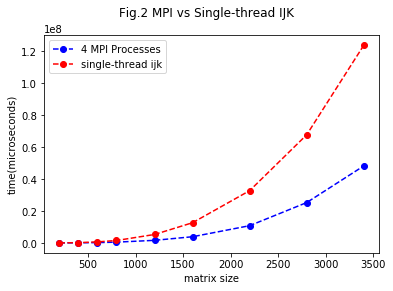

In [24]:
plt.plot(sample_output[:,0],sample_output[:,3], color="blue", linestyle='dashed', marker='o', label='4 MPI Processes')
plt.plot(sample_output_ijk[:,0],sample_output_ijk[:,1], color="red", linestyle='dashed', marker='o', label='single-thread ijk')
plt.xlabel('matrix size')
plt.ylabel('time(microseconds)')
plt.suptitle('Fig.2 MPI vs Single-thread IJK')
plt.legend()
plt.show()

# Conclusions

* Matrix size impact on calculation and data transfer time is equvivalent to algorithm complexity $O(n^3)$.
* There is a significant improvement in comparison with single-threaded version.

The speed up from employing MPI mechanism is obvious as in this case computations run in paralllel. However, unlike pthread or OpenMP version of the program, MPI also introduces cost of data transfer. Data transfer is required due to specifics of MPI architecture, requiring every process to work with it's own copy of the memory.